# Analysis of Crime in Chicago

### Content
+ Introduction
+ Data description 
+ Objectives
+ Data preparation
+ Data analysis, visualization 
+ Conclusion

## 1. Introduction

This project is aimed at Exploratory Data Analysis of a dataset of crimes in Chicago from 2001 to 2017. Chicago is one of the dangerous cities with the highest number of murders of any city in the United States.Given that Chicago is a large city with many neighborhoods, it is likely that different areas of the city experience different forms of crime. In this project, we will analyze the types of crimes, crime scenes and etc.

## 2.Data description

Crime in Chicago has been tracked by the Chicago Police Department's Bureau of Records since the beginning of the 20th century. The city's overall crime rate, especially the violent crime rate, is higher than the US average. Chicago was responsible for nearly half of 2016's increase in homicides in the US, though the nation's crime rates remain near historic lows.[5][6][7] The reasons for the higher numbers in Chicago remain unclear. An article in The Atlantic detailed how researchers and analysts had come to no real consensus on the cause for the violence. Below is data that we will be scraped and used for our analysis:

sourse: https://en.wikipedia.org/wiki/Crime_in_Chicago

ID - Unique identifier for the record.

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. 

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts.

District - Indicates the police district where the incident occurred. 
Ward - The ward (City Council district) where the incident occurred. 

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. 
FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

## 3. Objectives

1. Analyze the changes in crime in Chicago over the years.
2. Find out if certain types of crime are more likely in certain places, in certain days of the week, than other types
3. Analyze crime rates by type and location
4. Analyze effectiveness of fbi working by arrest success
5. Analyze of crime activity by hours and specific days

## 4. Data manipulation and 

In [62]:
import numpy as np 
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import random


from pandas.core.frame import DataFrame
cr1= pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)

cr2= pd.read_csv('Chicago_Crimes_2008_to_2011.csv',  error_bad_lines=False)
cr3= pd.read_csv('Chicago_Crimes_2012_to_2017.csv',  error_bad_lines=False)
chicago = pd.concat([cr1, cr2, cr3], ignore_index=False, axis=0)



b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [63]:
chicago.Date = pd.to_datetime(chicago.Date, format='%m/%d/%Y %I:%M:%S %p')
chicago.index = pd.to_datetime(chicago.index, unit='s')

In [64]:
chicago.head(20)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1970-01-01 00:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1970-01-01 00:00:01,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
1970-01-01 00:00:02,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
1970-01-01 00:00:03,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
1970-01-01 00:00:04,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
1970-01-01 00:00:05,6,4673631,HM263167,2006-03-30 22:30:00,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
1970-01-01 00:00:06,7,4673632,HM273234,2006-04-05 12:10:00,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
1970-01-01 00:00:07,8,4673633,HM275105,2006-04-05 15:00:00,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
1970-01-01 00:00:08,9,4673634,HM275063,2006-04-05 21:30:00,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
1970-01-01 00:00:09,10,4673635,HM268513,2006-04-03 03:00:00,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


## 5. Data analysis, visualization 

# Visualisation code for Q1
Analyze the changes in crime in Chicago over the years.

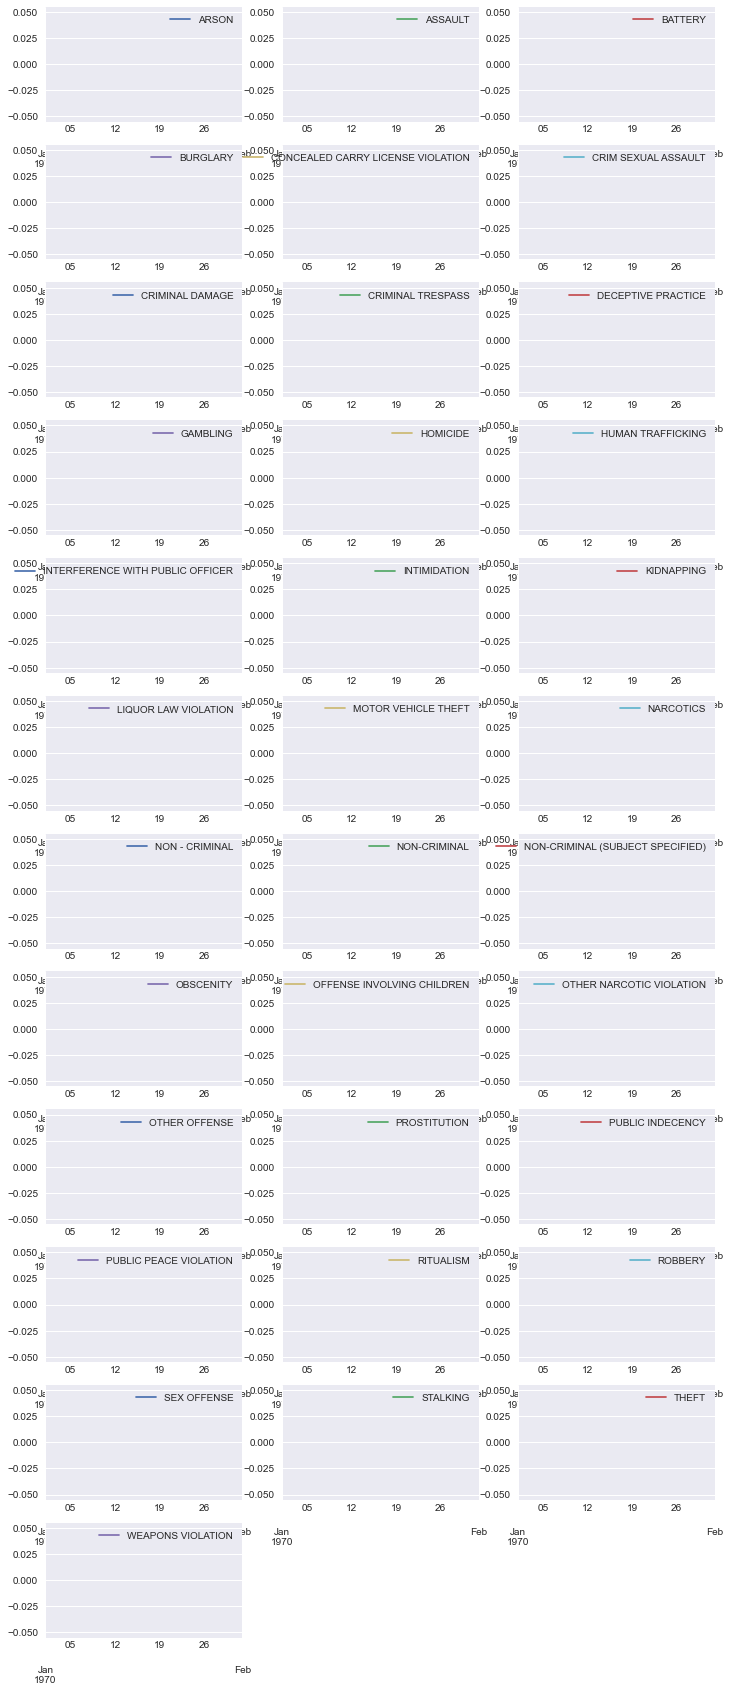

In [65]:
crcountdate = chicago.pivot_table('ID', aggfunc=np.size, 
    columns='Primary Type', index=chicago.index.date, fill_value=0)
crcountdate.index = pd.DatetimeIndex(crcountdate.index)
plo = crcountdate.rolling(365).sum().plot(figsize=(12, 30), subplots=True,
                    layout=(-1, 3), sharex=False, sharey=False)

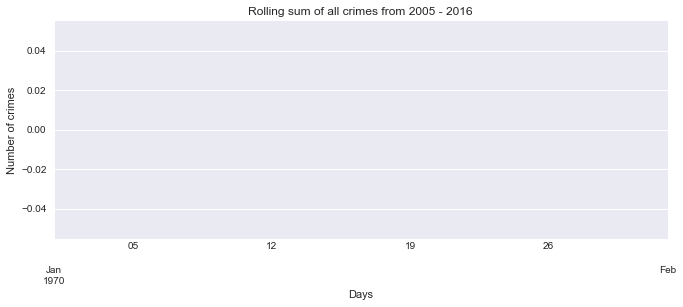

In [66]:
plt.figure(figsize=(11,4))
chicago.resample('').size().rolling(365).sum().plot()
plt.title('Rolling sum of all crimes from 2005 - 2016')
plt.ylabel('Number of crimes')
plt.xlabel('Days')
plt.show()


# Data preparation and Visualisation code for Q2
Find out if certain types of crime are more likely in certain places, in certain days of the week, than other types


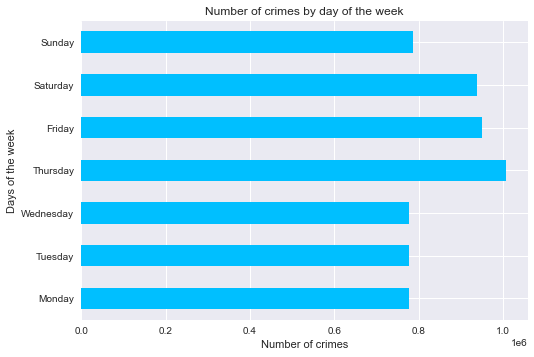

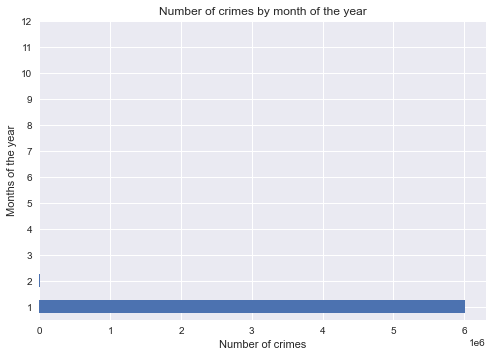

In [67]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
chicago.groupby([chicago.index.dayofweek]).size().plot(kind='barh', color= 'deepskyblue')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
chicago.groupby([chicago.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.yticks(np.arange(12), month)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by month of the year')
plt.show()

# Visualisation code for Q3
Analyze crime rates by type and location

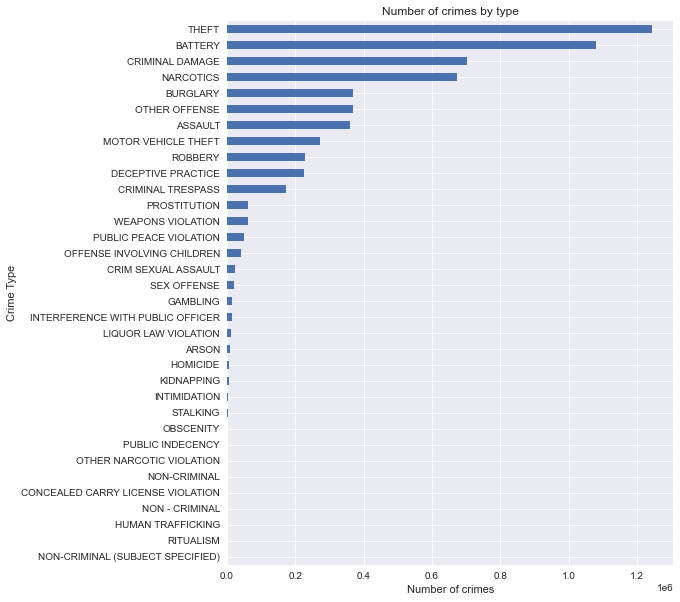

In [68]:
plt.figure(figsize=(8,10))

chicago.groupby([chicago['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

Here is the distribution of crime by their types, which crimes are most common among the top 20 most frequent crime types 

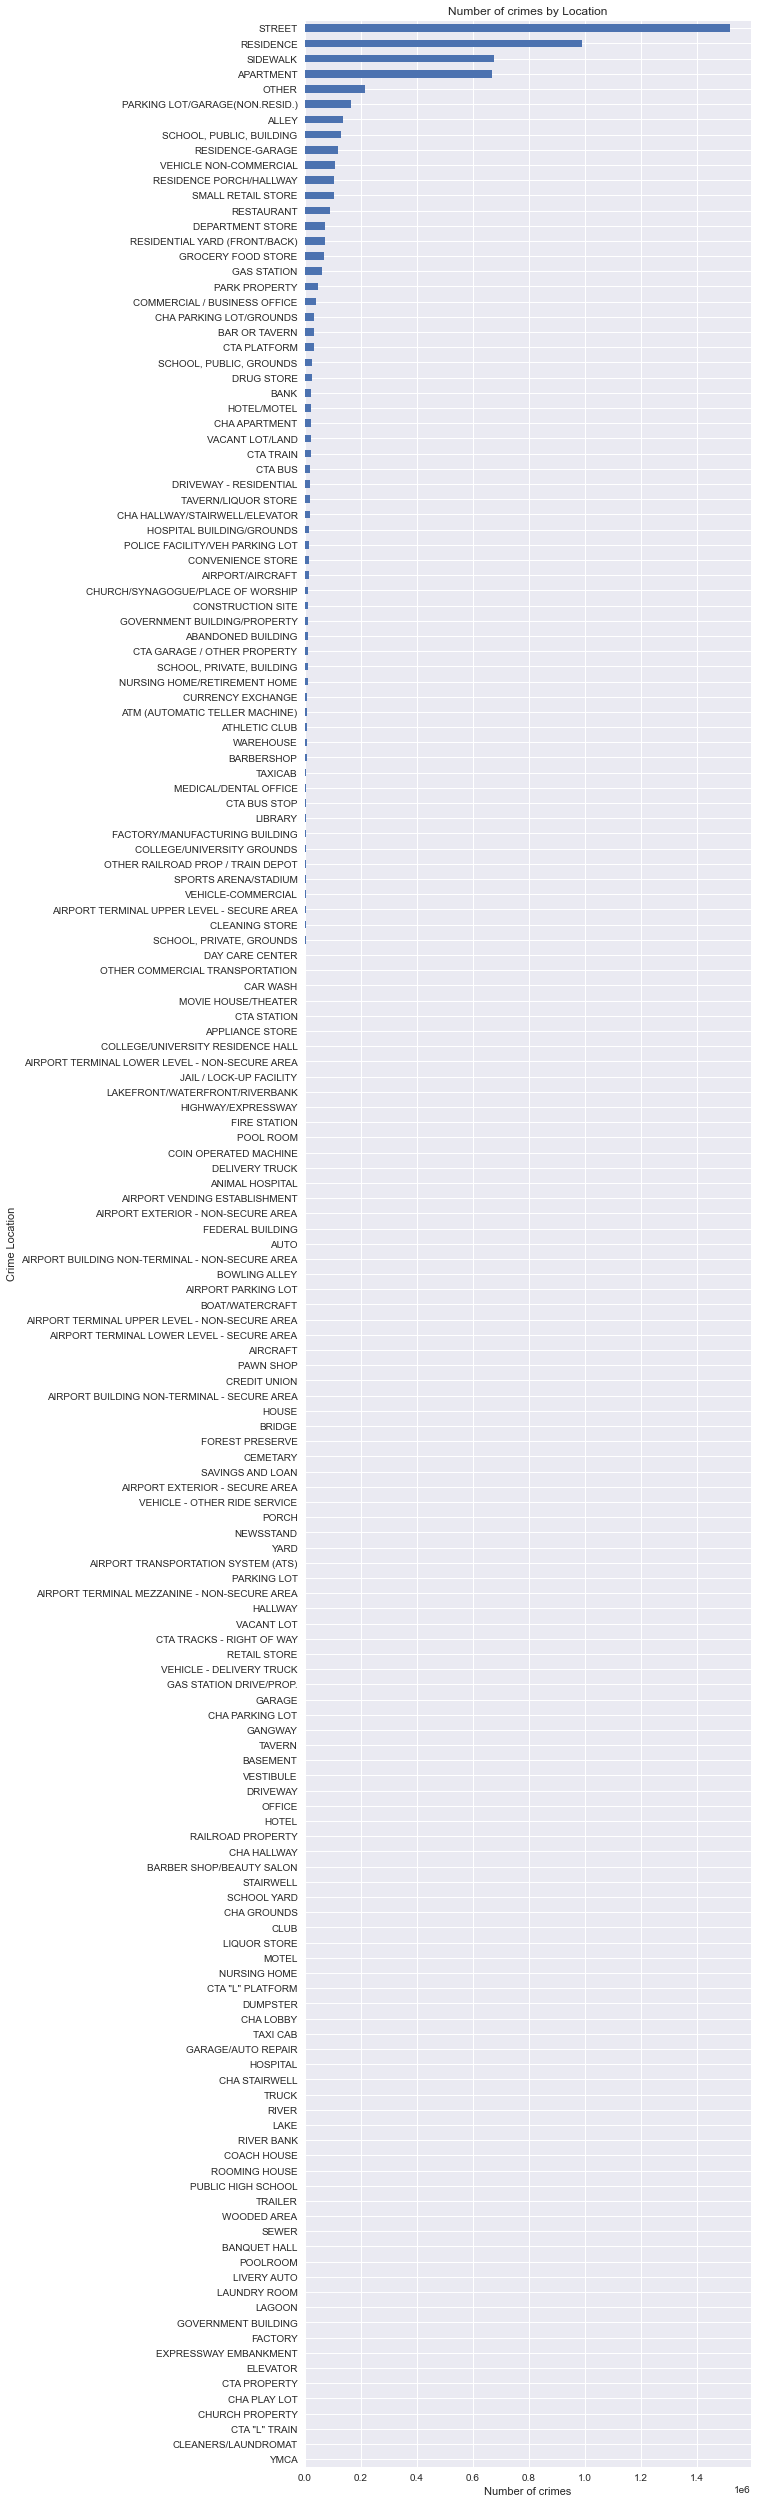

In [73]:
plt.figure(figsize=(8,45))
chicago.groupby([chicago['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()

# Data visualisation for Q4
Analyze effectiveness of fbi working by arrest success


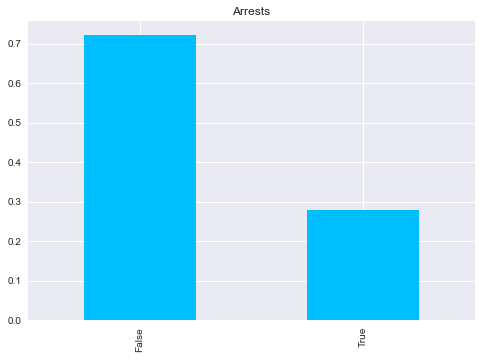

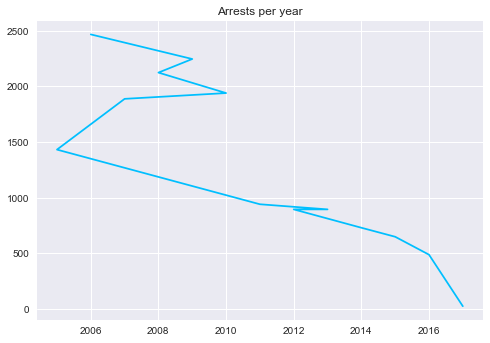

In [70]:
plt.subplot()
x = chicago.sample(60000) 
chicago['Arrest'].value_counts(normalize=True).plot.bar(color = 'deepskyblue')
plt.title("Arrests")
plt.show()

x[x.Arrest == True]['Year'].value_counts().plot.line(color= 'deepskyblue')
plt.title("Arrests per year")
plt.show()



# Data visualisation for Q5
Analyze of crime activity by hours and specific days

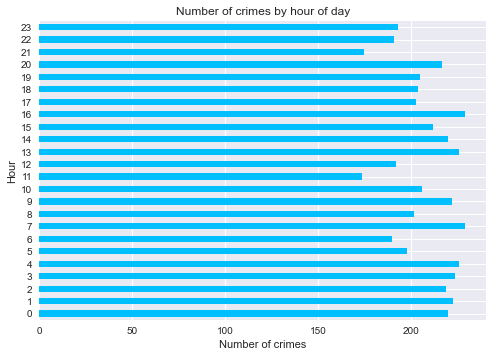

In [71]:
x = chicago.sample(5000)
x.groupby([x.index.hour]).size().plot(kind='barh', color = 'deepskyblue')
plt.ylabel('Hour')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by hour of day')
plt.show()

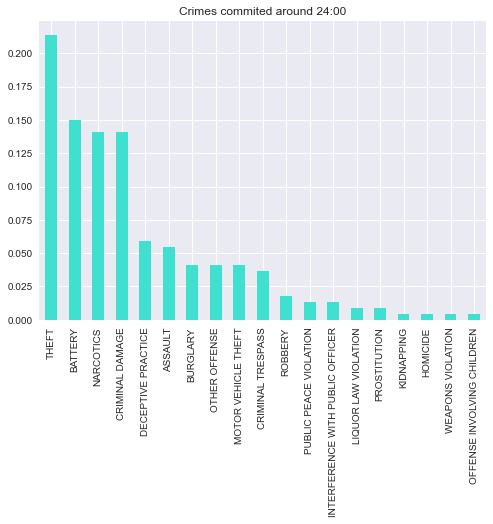

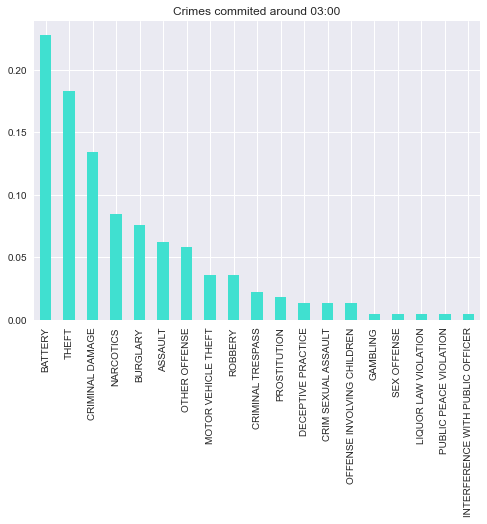

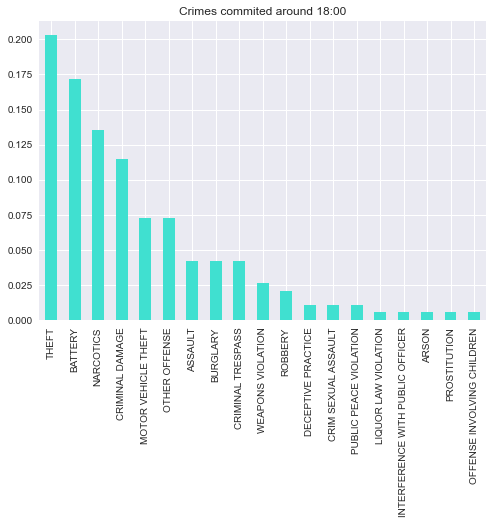

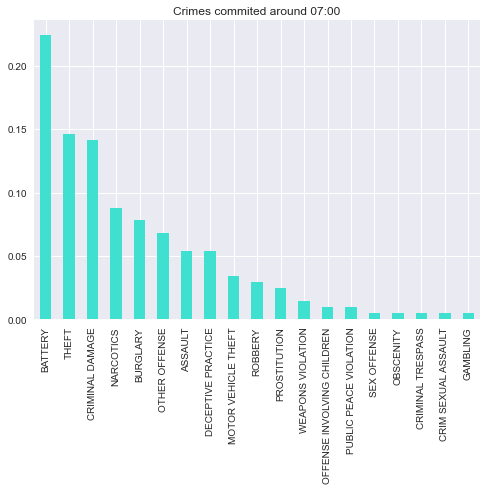

In [72]:
x[x.index.hour == 0]['Primary Type'].value_counts(normalize=True).plot.bar(color='turquoise')
plt.title("Crimes commited around 24:00")
plt.show()

x[x.index.hour == 3]['Primary Type'].value_counts(normalize=True).plot.bar(color='turquoise')
plt.title("Crimes commited around 03:00")
plt.show()

x[x.index.hour == 12]['Primary Type'].value_counts(normalize=True).plot.bar(color='turquoise')
plt.title("Crimes commited around 18:00")
plt.show()

x[x.index.hour == 19]['Primary Type'].value_counts(normalize=True).plot.bar(color='turquoise')
plt.title("Crimes commited around 07:00")
plt.show()



# Conclusion

Chicago has seen impressive declines in crime over the last four and a half decades.
Though the most distressed neighborhoods in the city remain the highest crime areas.
The objective of this report was to analyze Chicago’s crime. 
development of particular neighborhoods, shifts in patterns of employment and jobs,
changes in policing strategies and tactics, the development of new community-based
interventions, the creation of and subsequent overturning of the city’s ban on guns, and
larger shifts in the composition and size of the city’s population. Undoubtedly, the
relationship between crime and factors such as these as these are as complex and
diverse as the population of Chicago itself. 





Thank you for your time and attention!